In [1]:
from Survival_Analysis import *

/Users/elakhachatryan/Desktop/Fall 23-24/MARKETING/HWS/HW3/hw3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


***Parametric models:AFT***

In [2]:
df = pd.read_csv('telco.csv')
encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']
survival_df = pd.get_dummies(df,
               columns=encode_cols,
               prefix=encode_cols,
               drop_first=True)
 
survival_df.head()

,ID,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,1,13,44,9,64,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,2,11,33,7,136,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,True
2,3,68,52,24,116,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,4,33,33,12,33,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,23,30,9,30,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False


In [3]:
# Assuming df has columns 'customer_id', 'duration', and 'event'
primary_col = 'ID'
duration_col = 'tenure'
event_col = 'churn_Yes'

# Instantiate the AFTModelSelector
aft_selector = AFTModelSelector(survival_df, primary_col, duration_col, event_col)

# Select the best AFT model
aft_selector.select_best_model()

# Fit the selected model and generate churn predictions for 5 time periods
aft_selector.fit_and_predict(n_time_periods=50)

# Calculate CLV for each customer based on the final model
aft_selector.calculate_clv()

In [4]:
#Comparing models using summaries
for model_name, model in aft_selector.models.items():
    model.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.18
         time fit was run = 2023-11-26 21:21:33 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        address                           0.04       1.04       0.01             0.02             0.06                 1.03                 1.06
        age                               0.03       1.03       0.01             0.02             0.04                 1.02                 1.04
        custcat_E-service                 0.98       2.67       0.15             0.68             1.28                 1.97                 3.61
        custcat_Plus service              0.74       2.09       0.19             0.36             1.11                 1.43                 3.04
        custcat_Total service             0.96       2.62       0.21             0.55             1.38                 1.73                 3.97
        ed_Did not complete high school   0.46       1.59       0.19             0.08             0.84                 1.09                 2.32
        ed_High school degree             0.29       1.34       0.14             0.01             0.58                 1.01                 1.78
        ed_Post-undergraduate degree      0.18       1.19       0.19            -0.20             0.55                 0.82                 1.73
        ed_Some college                   0.25       1.29       0.14            -0.03             0.53                 0.97                 1.70
        forward_Yes                      -0.09       0.91       0.15            -0.38             0.20                 0.68                 1.22
        gender_Male                      -0.01       0.99       0.10            -0.21             0.19                 0.81                 1.20
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.79       0.46       0.14            -1.05            -0.52                 0.35                 0.60
        marital_Unmarried                -0.35       0.70       0.10            -0.56            -0.15                 0.57                 0.86
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.18                 0.73                 1.20
        region_Zone 3                     0.13       1.14       0.13            -0.12             0.38                 0.89                 1.46
        retire_Yes                        0.17       1.18       0.52            -0.85             1.18                 0.43                 3.26
        voice_Yes                        -0.29       0.75       0.15            -0.58            -0.00                 0.56                 1.00
        Intercept                         3.02      20.47       0.28             2.47             3.57                11.80                35.53
rho_    Intercept                         0.18       1.20       0.05             0.08             0.28                 1.09                 1.33

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ ID                                  0.00 -2.82 <0.005       7.72
        address                             0.00  4.79 <0.005      19.18
        age                          

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1454.15
         time fit was run = 2023-11-26 21:21:34 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
       address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.06       2.90       0.17             0.73             1.40                 2.08                 4.04
       custcat_Plus service              0.94       2.55       0.22             0.52             1.36                 1.68                 3.89
       custcat_Total service             1.21       3.35       0.25             0.72             1.70                 2.06                 5.47
       ed_Did not complete high school   0.38       1.46       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.31       1.36       0.16            -0.01             0.62                 0.99                 1.87
       ed_Post-undergraduate degree     -0.05       0.95       0.22            -0.49             0.38                 0.61                 1.46
       ed_Some college                   0.29       1.33       0.16            -0.04             0.61                 0.96                 1.84
       forward_Yes                      -0.20       0.82       0.18            -0.56             0.15                 0.57                 1.16
       gender_Male                       0.04       1.04       0.11            -0.19             0.26                 0.83                 1.30
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.79       0.45       0.14            -1.07            -0.51                 0.34                 0.60
       marital_Unmarried                -0.44       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       region_Zone 2                    -0.09       0.91       0.14            -0.37             0.18                 0.69                 1.20
       region_Zone 3                     0.06       1.06       0.14            -0.22             0.34                 0.81                 1.40
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.41       0.66       0.17            -0.74            -0.08                 0.48                 0.92
       Intercept                         2.57      13.09       0.30             1.97             3.17                 7.20                23.78
sigma_ Intercept                         0.27       1.31       0.05             0.18             0.36                 1.20                 1.43

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    ID                                  0.00 -2.39   0.02       5.89
       address                             0.00  4.80 <0.005      19.27
       age                                 0.00  4.59 <0.005  

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1455.13
         time fit was run = 2023-11-26 21:21:35 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
       address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.05       2.84       0.16             0.72             1.37                 2.06                 3.92
       custcat_Plus service              0.87       2.39       0.21             0.46             1.28                 1.59                 3.60
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.33
       ed_Did not complete high school   0.45       1.56       0.20             0.06             0.84                 1.06                 2.31
       ed_High school degree             0.32       1.38       0.15             0.02             0.62                 1.02                 1.86
       ed_Post-undergraduate degree     -0.06       0.94       0.21            -0.47             0.36                 0.62                 1.44
       ed_Some college                   0.25       1.29       0.15            -0.05             0.55                 0.95                 1.74
       forward_Yes                      -0.20       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.02       1.02       0.11            -0.19             0.24                 0.82                 1.27
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.81       0.44       0.14            -1.09            -0.54                 0.34                 0.59
       marital_Unmarried                -0.43       0.65       0.11            -0.65            -0.22                 0.52                 0.81
       region_Zone 2                    -0.05       0.96       0.13            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.13       1.14       0.14            -0.14             0.39                 0.87                 1.48
       retire_Yes                        0.06       1.06       0.47            -0.87             0.99                 0.42                 2.70
       voice_Yes                        -0.36       0.69       0.16            -0.68            -0.05                 0.51                 0.95
       Intercept                         2.55      12.81       0.29             1.98             3.12                 7.22                22.73
beta_  Intercept                         0.35       1.41       0.05             0.25             0.45                 1.28                 1.56

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ ID                                  0.00 -2.43   0.01       6.06
       address                             0.00  4.48 <0.005      17.04
       age                                 0.00  4.74 <0.005

In [5]:
#Comparing models using aic-s: we can see the model will choose LogNormal since it has the lowest AIC.
aft_selector.aic_values

{'Weibull': 2958.3571269466456,
 'Exponential': 3215.9608134637247,
 'LogNormal': 2950.3002131922785,
 'LogLogistic': 2952.2582596356683}

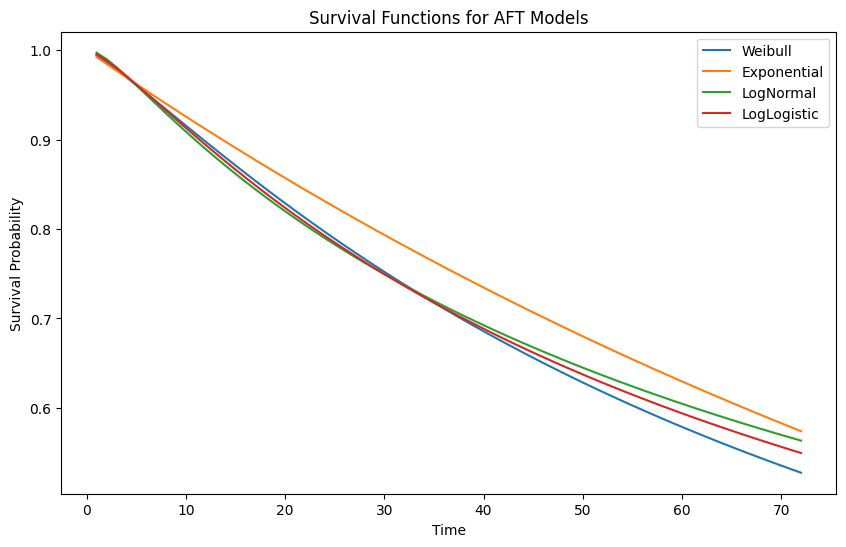

In [6]:
#Visualizing the model plots
aft_selector.plot_survival_functions()

In [7]:
#Choosing the best model
model_name =aft_selector.aft_model.__class__.__name__
print(f"The best model with the lowest AIC is {model_name}.")

The best model with the lowest AIC is LogNormalAFTFitter.


Choosing the LogNormalAFTFitter method is recommended because it specifically addresses survival data patterns, leveraging the log-normal distribution. Its selection based on the lowest AIC indicates a good balance between model fit and simplicity, making it a straightforward and effective choice for analyzing survival data.

In [8]:
# Keeping only the significant features
coefficients = aft_selector.aft_model.summary['coef']
p_values = aft_selector.aft_model.summary['p']
significance_level = 0.05

# Identify significant features and extract column names without prefixes
significant_feature_names = [feature[1] for feature, p_value in zip(coefficients.index, p_values) if p_value < significance_level and feature[1] != 'Intercept']

# Keep only significant features in the original DataFrame
significant_data = survival_df[significant_feature_names]


In [9]:
#Keeping the final model
final_model = aft_selector.aft_model

***CLV***

In [10]:
#Calculating CLV-s for each customer
aft_selector.calculate_clv()
aft_selector.clv_prediction.head()

pred_period,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,CLV
customer_id,,,,,,,,,,,,,,,,,,,,,
1,0.99940,0.988393,0.975474,0.961150,0.945846,0.929903,0.913541,0.896970,0.880303,0.863654,...,0.462357,0.453821,0.445473,0.437307,0.429315,0.421500,0.413853,0.406378,0.399050,42969.085503
2,0.99987,0.990863,0.981169,0.970846,0.960008,0.948764,0.937193,0.925390,0.913410,0.901314,...,0.561467,0.553136,0.544939,0.536875,0.528941,0.521129,0.513444,0.505884,0.498447,47590.543728
3,1.00000,0.991736,0.983530,0.975401,0.967321,0.959298,0.951341,0.943441,0.935588,0.927791,...,0.705422,0.699289,0.693202,0.687160,0.681165,0.675221,0.669323,0.663469,0.657659,53228.827883
4,0.99885,0.985884,0.970163,0.952635,0.933986,0.914697,0.895112,0.875448,0.855860,0.836472,...,0.410361,0.402001,0.393843,0.385889,0.378129,0.370566,0.363178,0.355973,0.348943,40306.739420
5,0.99994,0.991289,0.982261,0.972855,0.963113,0.953090,0.942835,0.932392,0.921813,0.911123,...,0.598022,0.589967,0.582033,0.574197,0.566477,0.558860,0.551351,0.543947,0.536648,49152.128500


In [11]:
survival_df['CLV'] = aft_selector.clv_prediction['CLV'].values
df['CLV'] = aft_selector.clv_prediction['CLV'].values
survival_df

,ID,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes,CLV
0,1,13,44,9,64,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,42969.085503
1,2,11,33,7,136,False,True,False,False,False,...,False,True,True,False,True,False,False,True,True,47590.543728
2,3,68,52,24,116,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,53228.827883
3,4,33,33,12,33,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,40306.739420
4,5,23,30,9,30,True,False,False,True,False,...,False,True,False,False,True,False,True,False,False,49152.128500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,10,39,0,27,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,32072.666164
996,997,7,34,2,22,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,25468.463023
997,998,67,59,40,944,False,True,True,False,False,...,False,False,True,True,True,False,False,True,False,52956.124819
998,999,70,49,18,87,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,48058.699872


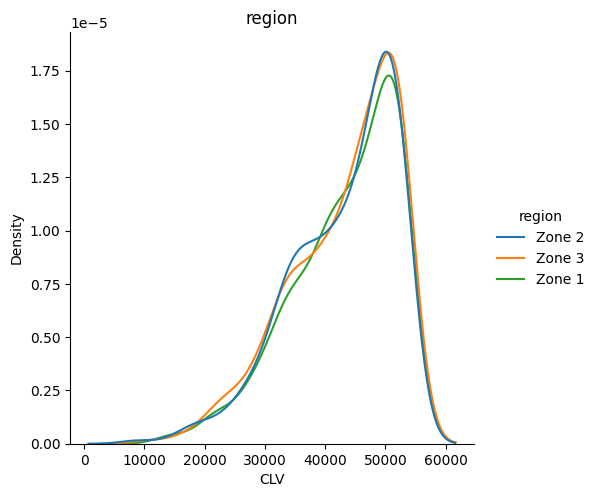

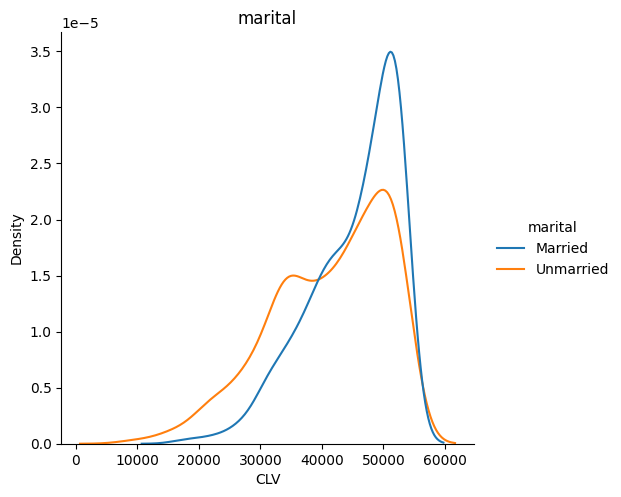

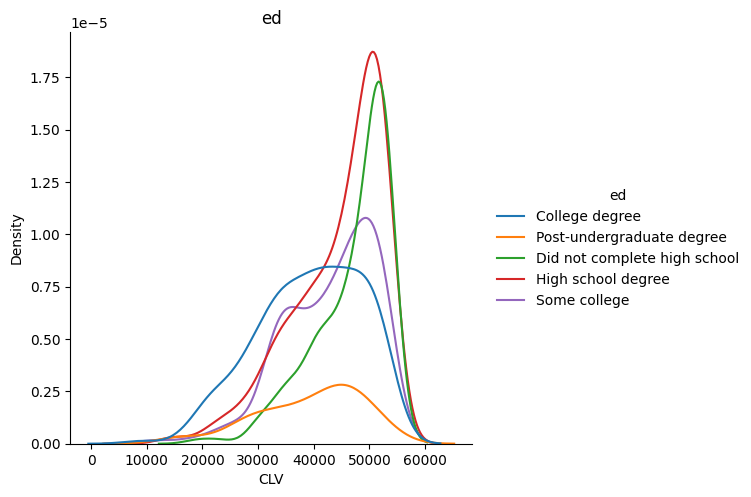

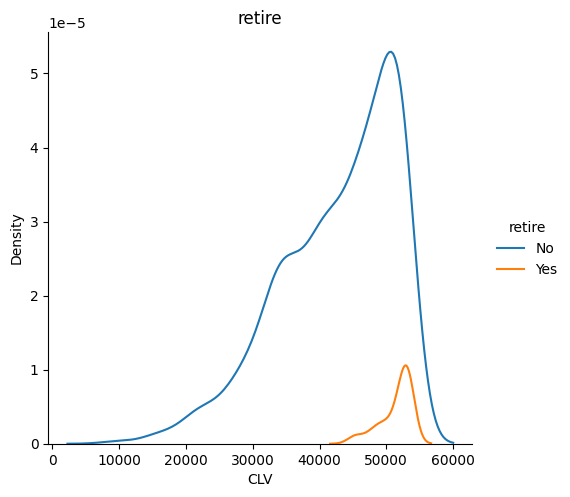

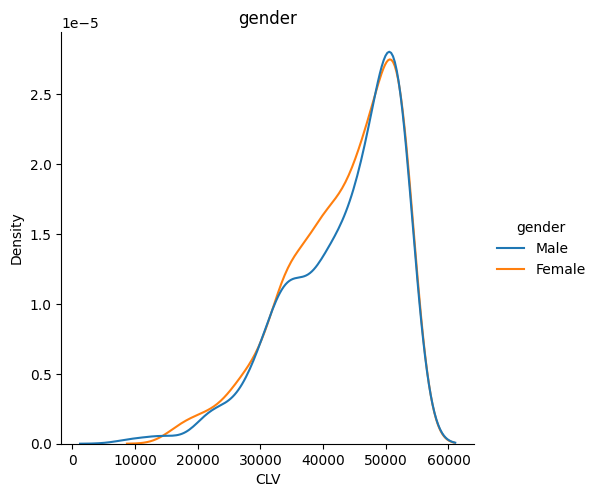

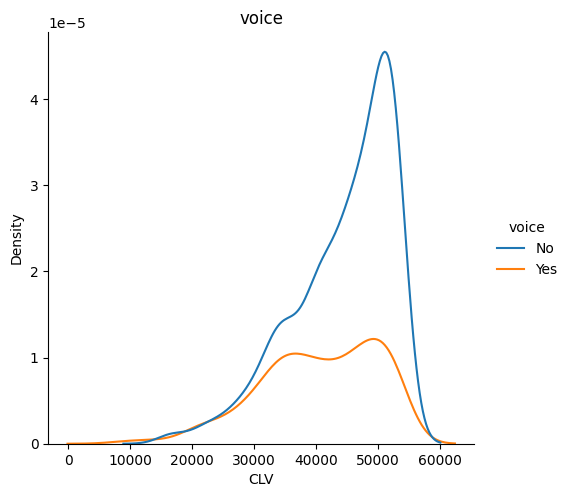

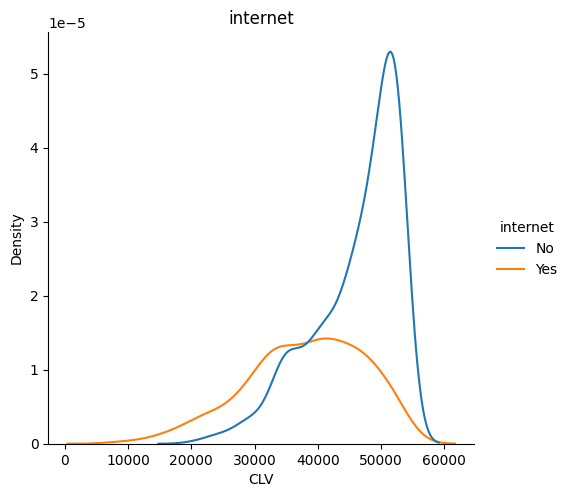

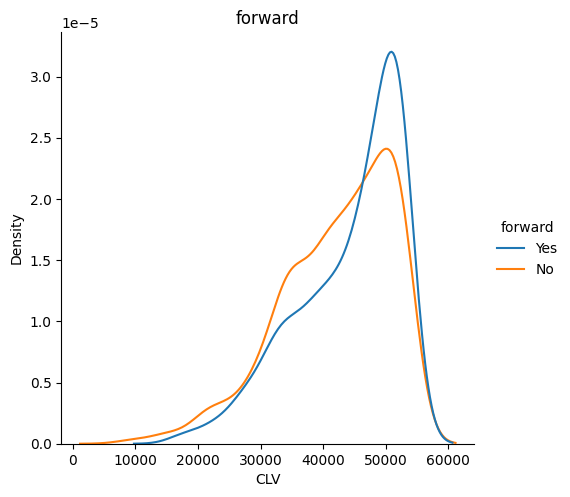

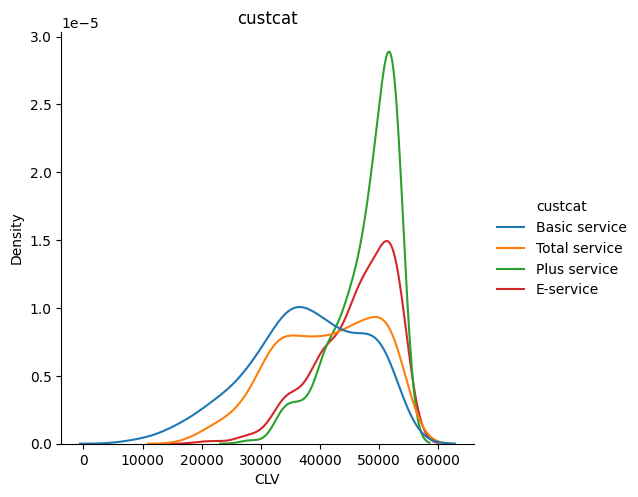

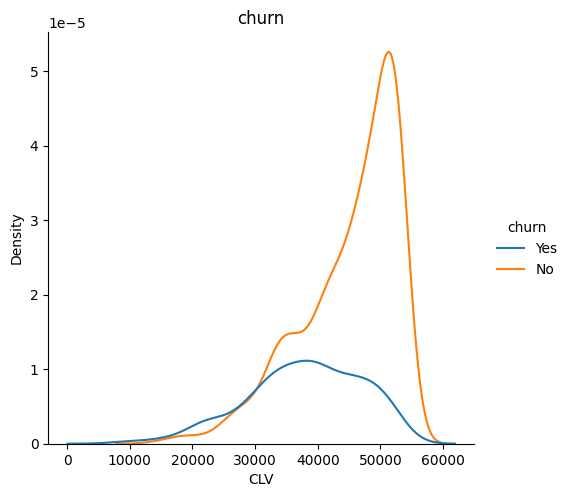

In [12]:
import seaborn as sns
categorical = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']
for column in categorical:
    sns.displot(df, kind='kde', x='CLV', hue=column)
    plt.title(column)

In [13]:
for column in categorical:
    print(df.groupby(column)[["CLV"]].mean(), "\n")

                 CLV
region              
Zone 1  43264.527970
Zone 2  43017.593036
Zone 3  43159.599346 

                    CLV
marital                
Married    45164.534725
Unmarried  41167.349637 

                                       CLV
ed                                        
College degree                39308.080866
Did not complete high school  46995.051247
High school degree            44513.326012
Post-undergraduate degree     39298.335982
Some college                  43023.254250 

                 CLV
retire              
No      42734.863125
Yes     51481.525476 

                 CLV
gender              
Female  42997.779329
Male    43304.563856 

                CLV
voice              
No     44314.466346
Yes    40470.683153 

                   CLV
internet              
No        46124.927523
Yes       38029.896904 

                  CLV
forward              
No       42149.080151
Yes      44171.141214 

                        CLV
custcat                   


**Report: Understanding Churn Risk and Improving Retention**

Interpretation of Coefficients:
To make sense of the numbers in the chosen Log-Normal AFT model, we're looking at Customer Lifetime Value (CLV) across different customer groups. The place where people live(region) doesn't make much of a difference, but being married(marital status) seems to make customers more likely to stay. Education doesn't seem to impact things much, and if someone isn't retired(retirement status), they're more likely have highes customer lifetime valus. Suprisingly, gender doesn't play a big role either. Also, if a customer's plan doesn't include voice or internet services, they're more likely to bring more revenue.

Identification of Most Valuable Segments:
Identifying the most valuable customer segments involves considering higher CLV, longer customer relationships, and a lower likelihood of leaving. This analysis highlights specific segments, such as those subscribed to 'E-service,' 'Plus service,' and 'Total service,' along with customers using internet and voice services. This strategic focus aligns with the overarching goal of retaining customers who have the potential for long-term value creation.

Estimation of Annual Retention Budget:
To keep the customers satisfied, setting aside some funds is crucial.Selecting a practical budget allocation of 10%, estimating the number of customers at risk within a year reveals an approximate count of 500. Then, we calculate how much money we should allocate to make sure we retain as many as possible. This budgeting approach ensures we're investing wisely in customer satisfaction.

Additional Suggestions for Retention:
Beyond budget considerations, there are other things to be done. Offering attractive deals and personalized messages for the married customers, tailoring services for the non-retired group to fit their busy lives, and ensuring that customers without voice or internet services feel valued. Incorporating regular surveys allows us to gather feedback and continuously improve the strategies for customer retention.
